In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import functions.uap as uap
import pickle as pk

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error, r2_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

from xgboost import XGBClassifier

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler

In [2]:
df = uap.get_data()
df_nofeat = uap.select_and_rename_columns(df, 'target_health')
df_nofeat

,target,temperature,specific_humidity,NO2_conc,O3_conc,CO_conc,FA_conc,cloud_coverage,cloud_density,AAI,SO2_conc
0,Healthy,18.516840,0.00804,0.000074,0.119095,0.021080,0.000064,0.000000,NaN,-1.231330,-0.000127
1,Healthy,22.546533,0.00839,0.000076,0.115179,0.022017,0.000171,0.059358,5.958538,-1.082553,0.000150
2,Healthy,27.031030,0.00750,0.000067,0.115876,0.020677,0.000124,0.082247,5.755760,-1.001241,0.000150
3,Healthy,23.971857,0.00391,0.000083,0.141557,0.021207,0.000081,0.121555,6.246885,-0.777023,0.000227
4,Healthy,16.816309,0.00535,0.000070,0.126369,0.037766,0.000140,0.037008,4.205691,0.366324,0.000390
...,...,...,...,...,...,...,...,...,...,...,...
30552,Healthy,4.256799,0.00352,0.000063,0.174995,0.039941,0.000024,0.001238,5.875377,-1.412609,0.000312
30553,Healthy,2.067438,0.00341,0.000072,0.157659,0.037872,-0.000014,0.007750,5.068010,-1.448509,0.000362
30554,Healthy,4.438623,0.00356,0.000068,0.168295,0.038539,0.000094,0.026480,10.443789,-1.722478,0.000107
30555,Unhealthy,10.573236,0.00523,0.000086,0.160637,0.038757,0.000063,0.175418,9.744343,-2.042785,0.000014


In [3]:
df= uap.get_data()
df_feat = uap.select_and_rename_columns(df, 'target_health', feateng=True)
df_feat

,target,temperature,specific_humidity,NO2_conc_weighted,O3_conc_weighted,FA_conc_weighted,SO2_conc_weighted,cloud_coverage,cloud_density,AAI
0,Healthy,18.516840,0.00804,0.000073,0.119095,0.000064,-0.000127,0.000000,NaN,-1.231330
1,Healthy,22.546533,0.00839,0.000075,0.108333,0.000161,0.000141,0.059358,5.958538,-1.082553
2,Healthy,27.031030,0.00750,0.000066,0.106367,0.000114,0.000138,0.082247,5.755760,-1.001241
3,Healthy,23.971857,0.00391,0.000078,0.124392,0.000071,0.000200,0.121555,6.246885,-0.777023
4,Healthy,16.816309,0.00535,0.000068,0.121577,0.000135,0.000375,0.037008,4.205691,0.366324
...,...,...,...,...,...,...,...,...,...,...
30552,Healthy,4.256799,0.00352,0.000063,0.174766,0.000024,0.000311,0.001238,5.875377,-1.412609
30553,Healthy,2.067438,0.00341,0.000071,0.156454,-0.000013,0.000359,0.007750,5.068010,-1.448509
30554,Healthy,4.438623,0.00356,0.000066,0.164012,0.000092,0.000105,0.026480,10.443789,-1.722478
30555,Unhealthy,10.573236,0.00523,0.000074,0.132784,0.000057,0.000012,0.175418,9.744343,-2.042785


***
# nan

In [6]:
df_nan

,target,temperature,specific_humidity,NO2_conc,O3_conc,CO_conc,FA_conc,cloud_coverage,cloud_density,AAI,SO2_conc,windspeed
0,Healthy,18.516840,0.00804,0.000074,0.119095,0.021080,0.000064,0.000000,NaN,NaN,NaN,2.343506
1,Healthy,22.546533,0.00839,0.000076,0.115179,0.022017,0.000171,0.059358,5.958538,NaN,0.000150,3.536009
2,Healthy,27.031030,0.00750,0.000067,0.115876,0.020677,0.000124,0.082247,5.755760,NaN,0.000150,6.157557
3,Healthy,23.971857,0.00391,0.000083,0.141557,0.021207,0.000081,0.121555,6.246885,NaN,0.000227,3.198883
4,Healthy,16.816309,0.00535,0.000070,0.126369,0.037766,0.000140,0.037008,4.205691,0.366324,0.000390,3.742413
...,...,...,...,...,...,...,...,...,...,...,...,...
30552,Healthy,4.256799,0.00352,0.000063,0.174995,0.039941,0.000024,0.001238,5.875377,NaN,0.000312,6.383007
30553,Healthy,2.067438,0.00341,0.000072,0.157659,0.037872,NaN,0.007750,5.068010,NaN,0.000362,2.463107
30554,Healthy,4.438623,0.00356,0.000068,0.168295,0.038539,0.000094,0.026480,10.443789,NaN,0.000107,0.171193
30555,Unhealthy,10.573236,0.00523,0.000086,0.160637,0.038757,0.000063,0.175418,9.744343,NaN,0.000014,1.504039


<Axes: >

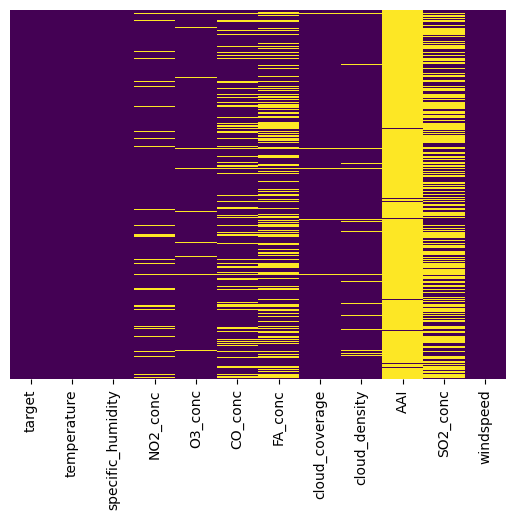

In [8]:
sns.heatmap(df_nan.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [9]:
nan_drop_stats = {}
total_rows = len(df)

for threshold in range(2, 7): 
    count = (df_nan.isna().sum(axis=1) >= threshold).sum()
    percentage = (count / total_rows) * 100
    nan_drop_stats[threshold] = (count, percentage)

for a, (count, pct) in nan_drop_stats.items():
    print(f"Rows with at least {a} NaNs: {count} ({pct:.2f}%)")

Rows with at least 2 NaNs: 20042 (65.59%)
Rows with at least 3 NaNs: 9655 (31.60%)
Rows with at least 4 NaNs: 4247 (13.90%)
Rows with at least 5 NaNs: 2037 (6.67%)
Rows with at least 6 NaNs: 379 (1.24%)


In [11]:
df_nan = df_nan[df_nan.isna().sum(axis=1) < 6]
len(df_nan)

30178

<Axes: >

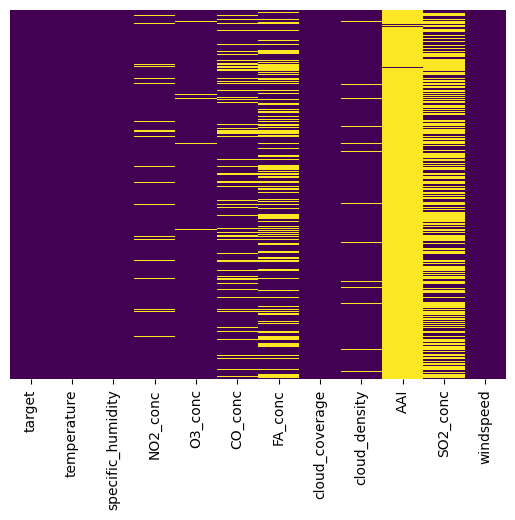

In [16]:
sns.heatmap(df_nan.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [33]:
df_nan_drop = df_nan.copy()

df_nan_drop = df_nan_drop.drop(columns=['AAI', 'SO2_conc'])

df_nan_drop

,target,temperature,specific_humidity,NO2_conc,O3_conc,CO_conc,FA_conc,cloud_coverage,cloud_density,windspeed
0,Healthy,18.516840,0.00804,0.000074,0.119095,0.021080,0.000064,0.000000,NaN,2.343506
1,Healthy,22.546533,0.00839,0.000076,0.115179,0.022017,0.000171,0.059358,5.958538,3.536009
2,Healthy,27.031030,0.00750,0.000067,0.115876,0.020677,0.000124,0.082247,5.755760,6.157557
3,Healthy,23.971857,0.00391,0.000083,0.141557,0.021207,0.000081,0.121555,6.246885,3.198883
4,Healthy,16.816309,0.00535,0.000070,0.126369,0.037766,0.000140,0.037008,4.205691,3.742413
...,...,...,...,...,...,...,...,...,...,...
30551,Healthy,5.174493,0.00479,0.000071,0.160607,0.037503,0.000100,0.069446,7.020483,2.220300
30552,Healthy,4.256799,0.00352,0.000063,0.174995,0.039941,0.000024,0.001238,5.875377,6.383007
30553,Healthy,2.067438,0.00341,0.000072,0.157659,0.037872,NaN,0.007750,5.068010,2.463107
30554,Healthy,4.438623,0.00356,0.000068,0.168295,0.038539,0.000094,0.026480,10.443789,0.171193


In [26]:
len(df_nan_drop)

30178

***
# null

In [10]:
df_zero

,target,temperature,specific_humidity,NO2_conc,O3_conc,CO_conc,FA_conc,cloud_coverage,cloud_density,AAI,SO2_conc,windspeed
0,Healthy,18.516840,0.00804,0.000074,0.119095,0.021080,0.000064,0.000000,NaN,0.000000,0.000000,2.343506
1,Healthy,22.546533,0.00839,0.000076,0.115179,0.022017,0.000171,0.059358,5.958538,0.000000,0.000150,3.536009
2,Healthy,27.031030,0.00750,0.000067,0.115876,0.020677,0.000124,0.082247,5.755760,0.000000,0.000150,6.157557
3,Healthy,23.971857,0.00391,0.000083,0.141557,0.021207,0.000081,0.121555,6.246885,0.000000,0.000227,3.198883
4,Healthy,16.816309,0.00535,0.000070,0.126369,0.037766,0.000140,0.037008,4.205691,0.366324,0.000390,3.742413
...,...,...,...,...,...,...,...,...,...,...,...,...
30552,Healthy,4.256799,0.00352,0.000063,0.174995,0.039941,0.000024,0.001238,5.875377,0.000000,0.000312,6.383007
30553,Healthy,2.067438,0.00341,0.000072,0.157659,0.037872,0.000000,0.007750,5.068010,0.000000,0.000362,2.463107
30554,Healthy,4.438623,0.00356,0.000068,0.168295,0.038539,0.000094,0.026480,10.443789,0.000000,0.000107,0.171193
30555,Unhealthy,10.573236,0.00523,0.000086,0.160637,0.038757,0.000063,0.175418,9.744343,0.000000,0.000014,1.504039


In [14]:
nan_drop_stats = {}
total_rows = len(df)

for threshold in range(2, 7): 
    count = (df_zero.isna().sum(axis=1) >= threshold).sum()
    percentage = (count / total_rows) * 100
    nan_drop_stats[threshold] = (count, percentage)

for a, (count, pct) in nan_drop_stats.items():
    print(f"Rows with at least {a} NaNs: {count} ({pct:.2f}%)")

Rows with at least 2 NaNs: 7340 (24.02%)
Rows with at least 3 NaNs: 4104 (13.43%)
Rows with at least 4 NaNs: 2006 (6.56%)
Rows with at least 5 NaNs: 379 (1.24%)
Rows with at least 6 NaNs: 363 (1.19%)


In [15]:

df_zero = df_zero[df_zero.isna().sum(axis=1) < 5]
len(df_zero)

30178

***
# ad hoc model

In [4]:
le = LabelEncoder()

X_nofeat = df_nofeat.drop(columns=['target'])

y_nofeat = df_nofeat['target']
y_nofeat = le.fit_transform(y_nofeat)

X_feat = df_feat.drop(columns=['target'])

y_feat = df_feat['target']
y_feat = le.fit_transform(y_feat)

In [5]:
X_train_nofeat, X_test_nofeat, y_train_nofeat, y_test_nofeat = train_test_split(X_nofeat, y_nofeat, test_size=0.2, random_state=42, stratify=y_nofeat)

In [6]:
X_train_nofeat.shape, X_test_nofeat.shape, y_train_nofeat.shape, y_test_nofeat.shape

((24445, 10), (6112, 10), (24445,), (6112,))

In [7]:
X_train_feat, X_test_feat, y_train_feat, y_test_feat = train_test_split(X_feat, y_feat, test_size=0.2, random_state=42, stratify=y_feat)

In [8]:
X_train_nofeat.shape, X_test_nofeat.shape, y_train_nofeat.shape, y_test_nofeat.shape

((24445, 10), (6112, 10), (24445,), (6112,))

In [19]:
pipe = ImbPipeline([
    ('imputer' , KNNImputer()),
    ('scaler' , MinMaxScaler()),
    ('oversampling', SMOTE()),
    ('model', XGBClassifier())
])

In [20]:
nofeat_model = pipe.fit(X_train_nofeat, y_train_nofeat)

In [21]:
y_pred_nofeat = nofeat_model.predict(X_test_nofeat)

In [22]:
print("\nClassification Report: no feature engineering\n")
print(classification_report(y_test_nofeat, y_pred_nofeat))


Classification Report: no feature engineering

              precision    recall  f1-score   support

           0       0.93      0.84      0.89      5124
           1       0.46      0.69      0.55       988

    accuracy                           0.82      6112
   macro avg       0.70      0.77      0.72      6112
weighted avg       0.86      0.82      0.83      6112



In [24]:
zero_model = pipe.fit(X_train_feat, y_train_feat)

In [25]:
y_pred_feat = zero_model.predict(X_test_feat)

In [26]:
print("\nClassification Report: feature engineered\n")
print(classification_report(y_test_feat, y_pred_feat))


Classification Report: feature engineered

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      5124
           1       0.38      0.63      0.47       988

    accuracy                           0.77      6112
   macro avg       0.65      0.71      0.66      6112
weighted avg       0.83      0.77      0.79      6112

